In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

import numpy as np, pandas as pd
import statsmodels.api as sm
from patsy import dmatrices


from pathlib import Path

In [2]:
# Cargamos las bases de datos en dataframes de pandas
df_1 = pd.read_csv("synthetic_mmm_weekly_india.csv")

# Visualizamos el frame
df_1


,Week,Geo,Brand,SKU,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,...,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
0,2022-07-04,CENTRAL,BrandA,BrandA_SKU1,106.327944,10551.108260,99.231753,99.231753,0,0,...,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.244440,1.180806,5.378450
1,2022-07-04,CENTRAL,BrandA,BrandA_SKU2,188.503304,19452.418311,103.194045,103.194045,0,0,...,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.244440,1.180806,5.378450
2,2022-07-04,CENTRAL,BrandA,BrandA_SKU3,209.247921,19583.201537,93.588512,93.588512,0,0,...,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.244440,1.180806,5.378450
3,2022-07-04,CENTRAL,BrandB,BrandB_SKU1,237.698249,19374.506591,81.508832,81.508832,0,0,...,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.244440,1.180806,5.378450
4,2022-07-04,CENTRAL,BrandB,BrandB_SKU2,203.075116,14667.008092,72.224546,72.224546,0,0,...,74.714021,77.999979,0.326712,0.406848,36.923185,3.071753,120.954667,5.244440,1.180806,5.378450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,2025-06-23,WEST,BrandB,BrandB_SKU2,1266.172359,82719.743029,73.156557,65.330555,0,1,...,63.233988,56.015071,0.920712,0.802590,96.658640,4.696990,140.425227,4.532557,1.062112,4.776365
11228,2025-06-23,WEST,BrandB,BrandB_SKU3,393.828718,28588.726498,81.805327,72.591777,0,1,...,63.233988,56.015071,0.920712,0.802590,96.658640,4.696990,140.425227,4.532557,1.062112,4.776365
11229,2025-06-23,WEST,BrandC,BrandC_SKU1,1452.070491,71312.747389,54.994597,49.111078,0,1,...,63.233988,56.015071,0.920712,0.802590,96.658640,4.696990,140.425227,4.532557,1.062112,4.776365
11230,2025-06-23,WEST,BrandC,BrandC_SKU2,1126.508821,62357.613687,61.940968,55.354750,0,1,...,63.233988,56.015071,0.920712,0.802590,96.658640,4.696990,140.425227,4.532557,1.062112,4.776365


In [5]:
# Información general del DataFrame
print(f"Informacion del data set:---------------------\n")
df_1.info() 
print(" ")

# Verificamos si hay valores nulos en ambos DataFrames
print(f"Valores nulos:\n---------------------------------\n{df_1.isnull().sum()}\n") 

# Verificamos si hay filas duplicadas en ambos DataFrames    
print(f"\n---------------------------------\nDuplicados: {df_1.duplicated().sum()}") 


Informacion del data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Week                     11232 non-null  object 
 1   Geo                      11232 non-null  object 
 2   Brand                    11232 non-null  object 
 3   SKU                      11232 non-null  object 
 4   Sales_Units              11232 non-null  float64
 5   Sales_Value              11232 non-null  float64
 6   MRP                      11232 non-null  float64
 7   Net_Price                11232 non-null  float64
 8   Feature_Flag             11232 non-null  int64  
 9   Display_Flag             11232 non-null  int64  
 10  TPR_Flag                 11232 non-null  int64  
 11  Trade_Spend              11232 non-null  float64
 12  TV_Impressions           11232 non-null  float64
 13  YouTube_Impressions      112

- Notamos que el tipo de dato de **"Week"** esta como **"Object"** asi que cambiamos el tipo de dato de la columna **"week"** a **"datetime64[ns]"**
- también tenemos datos **"object"** así que para reducir el espacio en memoria los cambiaremos a **"category"**
- Por último, estandarizaremos el texto a todos en mayúsculas

In [9]:
# Creamos una lista con las columnas de texto
text_cols = ['Geo','Brand','SKU']
df_1[text_cols]

# Estandarizamos los textos a mayúsculas y cambiamos a tipo "category"
for col in text_cols:
    df_1[col] = df_1[col].str.upper().astype('category')

# Convertimos la columna "Week" a tipo datetime, manejando errores
df_1["Week"] = pd.to_datetime(df_1["Week"], errors="coerce")

# Revisamos el cambio
print(f"Informacion del data set:---------------------\n")
df_1.info()
print(" ")

# visualizamos un df
df_1

#guardamos el df limpio
df_1.to_csv("synthetic_mmm_weekly_india_limpio.csv", index=False)

Informacion del data set:---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Week                     11232 non-null  datetime64[ns]
 1   Geo                      11232 non-null  category      
 2   Brand                    11232 non-null  category      
 3   SKU                      11232 non-null  category      
 4   Sales_Units              11232 non-null  float64       
 5   Sales_Value              11232 non-null  float64       
 6   MRP                      11232 non-null  float64       
 7   Net_Price                11232 non-null  float64       
 8   Feature_Flag             11232 non-null  int64         
 9   Display_Flag             11232 non-null  int64         
 10  TPR_Flag                 11232 non-null  int64         
 11  Trade_Spend              11232 non-null  floa

Ahora buscaremos cuales son las diferentes categorías de mis columnas categóricas

In [7]:
# Revisamos los nombre de las diferentes categorías de las columnas categoricas de ambos DataFrames
for col in text_cols:
    c1 = df_1[col].cat.categories
    
    print(f"Categorias en '{col}' del df_1:\n",list(c1))
    print(" ")

# Revisamos la cantidad de cat0egorías en las columnas categoricas de ambos DataFrames
for col in text_cols:
    print(f"Cantidad de categorias en '{col}' del df_1:", df_1[col].nunique())
    

Categorias en 'Geo' del df_1:
 ['CENTRAL', 'EAST', 'METRO_DELHI', 'METRO_MUMBAI', 'NORTH', 'NORTHEAST', 'SOUTH', 'WEST']
 
Categorias en 'Brand' del df_1:
 ['BRANDA', 'BRANDB', 'BRANDC']
 
Categorias en 'SKU' del df_1:
 ['BRANDA_SKU1', 'BRANDA_SKU2', 'BRANDA_SKU3', 'BRANDB_SKU1', 'BRANDB_SKU2', 'BRANDB_SKU3', 'BRANDC_SKU1', 'BRANDC_SKU2', 'BRANDC_SKU3']
 
Cantidad de categorias en 'Geo' del df_1: 8
Cantidad de categorias en 'Brand' del df_1: 3
Cantidad de categorias en 'SKU' del df_1: 9


Revisamos todas las columnas numericas y al mismo tiempo obtenemos valores estadisticos como...
- Count
- Mean
- Min
- 25%
- 50%
- 75%
- Max
- Std

Notamos lo siguiente:
- **count** indica que no hay valores nulos, ya que no hay valores faltantes, puesto que marca el número máximo de filas 11232 en todas las columnas.
- **mean** o media, indica el valor medio de toda nuestra columna.
- **50%** o mediana, si la **media** está lejos del valor de la **mediana** puede haber asimetría, es decir los valores pueden inclinarse más a un lado u a otro
- **std** indica que hay muchas columnas con valores muy dispersos, esto puede ser un indicador de que algunas campañas publicitarias afectan la dispersión de los resultados como se ve en **Sales_units** ya que si fuera un valor bajo indicaría valores cerca de la media.
- **25%** indica que todos los valores debajo de este porcentaje son el 25% de los datos (datos más bajos)
- **75%** indica que todos los valores debajo de este porcentaje representan el 75% de los datos (datos más altos)
- **max** indica el valor más alto de la columna 
- **min** indica el valor más pequeño de la columna 

In [8]:
# Ajustamos las opciones de pandas para mostrar todas las columnas y filas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Revisamos todas las columnas numericas usando describe()
df_1.describe()

,Week,Sales_Units,Sales_Value,MRP,Net_Price,Feature_Flag,Display_Flag,TPR_Flag,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,FB_Banner_Content_Score,IG_Banner_Content_Score,Weighted_Distribution,Numeric_Distribution,TDP,NOS,CPI,GDP_Growth,Festival_Index,Rainfall_Index
count,11232,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,1.123200e+04,1.123200e+04,1.123200e+04,11232.000000,11232.000000,1.123200e+04,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000,11232.000000
mean,2023-12-28 12:00:00,422.432277,33099.052755,79.911714,78.353600,0.185096,0.183494,0.157853,53976.998415,1.043587e+06,5.342054e+05,3.209519e+05,138936.271516,85324.757262,3.171986e+05,70.340914,65.260831,0.621472,0.655593,67.510443,4.419803,130.824700,4.951270,1.538062,2.049459
min,2022-07-04 00:00:00,25.535563,2054.711829,52.759457,46.696772,0.000000,0.000000,0.000000,6140.424107,1.026227e+05,4.633866e+04,1.417019e+04,12882.596915,10148.344288,2.338768e+04,46.951991,29.567246,0.304993,0.285294,29.143297,2.652576,114.561767,3.653294,0.855645,0.323376
25%,2023-04-01 06:00:00,203.969367,15007.837952,63.203164,62.671267,0.000000,0.000000,0.000000,12673.917223,4.442356e+05,2.302331e+05,1.277735e+05,70904.254072,43486.434836,1.426062e+05,63.327421,55.875976,0.489792,0.524483,52.447251,3.935697,125.192171,4.578649,0.941337,0.896604
50%,2023-12-28 12:00:00,323.586788,24596.823790,80.030377,78.568337,0.000000,0.000000,0.000000,19378.931478,7.062867e+05,3.566884e+05,2.237774e+05,109296.320070,63118.936446,2.233546e+05,70.317890,65.704321,0.611913,0.649149,66.192002,4.399163,131.109177,4.949762,1.062112,1.221250
75%,2024-09-24 18:00:00,531.248687,41863.015312,95.496787,93.973444,0.000000,0.000000,0.000000,78726.652353,1.327112e+06,7.029348e+05,4.198755e+05,177406.083163,99597.757746,4.038306e+05,76.673114,75.063975,0.734495,0.785918,81.021053,4.876756,136.418406,5.287799,2.412943,3.586211
max,2025-06-23 00:00:00,3353.778891,307497.874229,112.972616,112.972616,1.000000,1.000000,1.000000,455774.634611,7.263913e+06,3.712291e+06,2.312792e+06,821285.539259,695204.833757,2.195923e+06,95.873028,97.970793,1.000000,1.000000,116.434542,7.271363,146.923272,6.620930,3.542418,6.081567
std,NaN,329.007914,27498.675570,16.889088,16.923665,0.388393,0.387088,0.364619,59637.303208,9.768455e+05,4.814188e+05,2.863178e+05,103010.038630,71879.522559,2.794874e+05,9.197061,12.829229,0.162224,0.163261,18.654375,0.685341,7.274168,0.495805,0.853530,1.523942


Hacemos un grafico de caja y bigotes para ver la dispercion de nuestros datos para ello hacemos lo siguiente:
- Seleccionamos de nuestro dataframe solo las columnas que son numericas
- Usaremos sns.boxplot

Cantidad de columnas numericas: 21


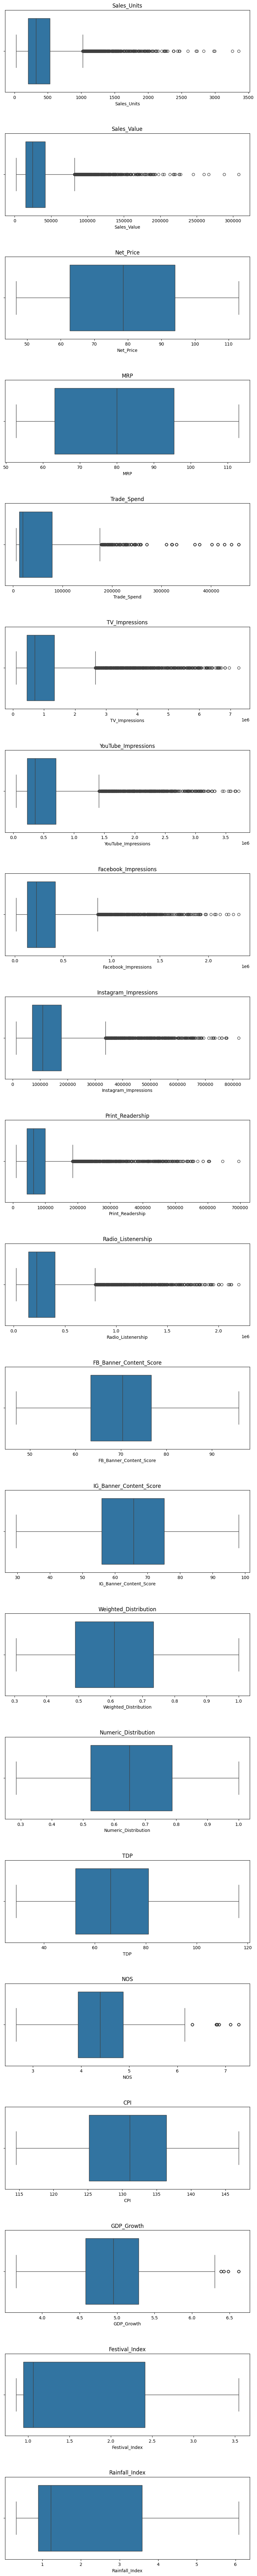

In [8]:
# Columnas numericas de interes
columns_numericas = ['Sales_Units', 'Sales_Value','Net_Price', 'MRP', 'Trade_Spend', 'TV_Impressions', 'YouTube_Impressions', 'Facebook_Impressions', 'Instagram_Impressions', 'Print_Readership', 'Radio_Listenership', 'FB_Banner_Content_Score', 'IG_Banner_Content_Score', 'Weighted_Distribution', 'Numeric_Distribution', 'TDP', 'NOS', 'CPI', 'GDP_Growth', 'Festival_Index', 'Rainfall_Index']

# Cantidad de columnas numericas
n1 = len(columns_numericas)
print(f"Cantidad de columnas numericas: {n1}")


# Graficos de caja y bigotes para el primer DataFrame ---------------------------------------------
fig,ax = plt.subplots(nrows=n1, ncols=1, figsize=(10,5*n1))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_numericas):
    sns.boxplot(x=col, data=df_1, ax=ax[i])   # horizontal (x=col). Para vertical, usa y=col.
    ax[i].set_title(col)

- Creamos un nuevo dataframe que contendra de manera organizada las semanas por su region, marca de manera que tendremos...
- 156 semanas X 8 categorias de region x 3 marcas unos 3744 resultados 
- al tener hacer esto de agrupar consistentemente por semana, marca y región, evitamos mezclar datos de diferentes niveles que podrían llevar a conclusiones engañosas.

- en resumen asi podremos evitar la paradoja de Simpson


In [9]:
# ORganizamos las columnas por categorías 
sales_cols = ['Sales_Units','Sales_Value']

media_cols = ['TV_Impressions','YouTube_Impressions','Facebook_Impressions','Instagram_Impressions','Print_Readership','Radio_Listenership']

promo_cols = ['TPR_Flag','Feature_Flag','Display_Flag']

price_cols = ['Net_Price','MRP']

dist_cols = ['Weighted_Distribution','Numeric_Distribution','TDP','NOS']

macro_cols = ['CPI','GDP_Growth','Festival_Index','Rainfall_Index']

other_cols = ['Trade_Spend']

# Función para calcular el promedio ponderado
def weighted_avg(values, weights): # Funcion que necesita dos listas: valores y pesos
    sw = weights.sum()
    return (values * weights).sum() / sw


# 4) Agregación al grano Week × Brand × Geo
agg_rows = []
for (w, b, g), d in df_1.groupby(['Week','Brand','Geo'], sort=True):
    row = {'Week': w, 'Brand': b, 'Geo': g}
    
    # Sumas
    row['Sales_Units'] = d['Sales_Units'].sum()
    row['Sales_Value'] = d['Sales_Value'].sum()
    row['Trade_Spend'] = d['Trade_Spend'].sum()
    for c in media_cols:
        row[c] = d[c].sum()
        
    # Promedios ponderados por unidades para precios
    for c in price_cols:
        row[c] = weighted_avg(d[c], d['Sales_Units'])
        
    # Promedios simples para distribución
    for c in dist_cols:
        row[c] = d[c].mean()
        
    # Flags: si algún SKU estuvo en promoción esa semana en esa marca/región
    for c in promo_cols:
        row[c] = int(d[c].max() > 0)
        
    # Macros (promedio por claridad)
    for c in macro_cols:
        row[c] = d[c].mean()
        
    agg_rows.append(row)

panel = pd.DataFrame(agg_rows).sort_values(['Brand','Geo','Week']).reset_index(drop=True)
panel['entity'] = panel['Brand'] + '_' + panel['Geo']

# 5) Comprobaciones rápidas
n_entities = panel['entity'].nunique()
weeks_span = (panel['Week'].min(), panel['Week'].max())
rows_per_entity = panel.groupby('entity').size().describe().to_dict()

summary = {
    "filas_en_panel": int(len(panel)),
    "entidades_Brand_Geo": int(n_entities),
    "rango_semanas": [str(weeks_span[0].date()), str(weeks_span[1].date())],
    "filas_por_entidad_stats": {k: (float(v) if isinstance(v, (np.floating, np.integer)) else v)
                                for k,v in rows_per_entity.items()}
}

panel



C:\Users\OSKR-\AppData\Local\Temp\ipykernel_24460\945516191.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for (w, b, g), d in df_1.groupby(['Week','Brand','Geo'], sort=True):


,Week,Brand,Geo,Sales_Units,Sales_Value,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,Net_Price,MRP,Weighted_Distribution,Numeric_Distribution,TDP,NOS,TPR_Flag,Feature_Flag,Display_Flag,CPI,GDP_Growth,Festival_Index,Rainfall_Index,entity
0,2022-07-04,BRANDA,CENTRAL,504.079168,49586.728109,36326.837798,2.339061e+06,1.141677e+06,959314.030181,324266.835783,177525.656276,2.238292e+06,98.370913,98.370913,0.326712,0.406848,36.923185,3.071753,0,0,0,120.954667,5.244440,1.180806,5.378450,BRANDA_CENTRAL
1,2022-07-11,BRANDA,CENTRAL,863.095984,84510.338576,213276.438450,1.927566e+06,1.229816e+06,812780.025657,327241.265595,255984.588921,2.146512e+06,97.915342,97.915342,0.339841,0.435635,39.028371,2.861870,0,1,0,121.348852,5.172292,1.180806,4.885889,BRANDA_CENTRAL
2,2022-07-18,BRANDA,CENTRAL,863.243257,85555.770253,219095.787577,2.133933e+06,1.040628e+06,773693.205588,285494.884066,211201.829895,1.796309e+06,99.109688,99.109688,0.383476,0.459516,42.920417,3.336179,0,1,0,121.739493,5.527240,1.180806,4.296654,BRANDA_CENTRAL
3,2022-07-25,BRANDA,CENTRAL,725.939309,71620.165224,26328.335516,2.408034e+06,1.124749e+06,954751.833631,320425.024591,243838.409864,1.662432e+06,98.658613,98.658613,0.399021,0.530084,45.159635,3.658301,0,0,0,122.123099,5.895747,1.180806,4.950548,BRANDA_CENTRAL
4,2022-08-01,BRANDA,CENTRAL,818.486471,80151.356041,27677.730486,2.558500e+06,1.277858e+06,718432.540107,327414.829052,242769.281569,2.973394e+06,97.926305,97.926305,0.393911,0.438237,50.585126,3.834527,0,0,0,122.496281,5.440235,1.180806,4.373309,BRANDA_CENTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,2025-05-26,BRANDC,WEST,3219.872183,170697.620618,272152.560211,2.010202e+06,1.666260e+06,367868.038964,370038.774987,128505.557935,5.047294e+05,53.013788,59.312531,0.921375,0.792171,93.742160,4.822904,1,0,0,138.957182,4.503794,1.062112,0.907397,BRANDC_WEST
3740,2025-06-02,BRANDC,WEST,2394.182405,127249.514318,274695.708752,1.509998e+06,5.658615e+05,275177.831945,140690.081272,113857.567846,1.254107e+06,53.149465,59.467071,0.937940,0.872175,89.779162,4.113455,1,0,0,139.307421,4.259075,1.062112,4.593784,BRANDC_WEST
3741,2025-06-09,BRANDC,WEST,2016.465407,121244.431724,40991.213987,1.658110e+06,5.060327e+05,272608.820880,128467.421274,112553.115165,1.350324e+06,60.127206,60.127206,0.966303,0.876978,94.188621,4.824388,0,0,0,139.670969,4.602573,1.062112,4.345804,BRANDC_WEST
3742,2025-06-16,BRANDC,WEST,1972.909561,117697.614289,138655.985477,1.752080e+06,5.294801e+05,401671.781538,146063.195999,142259.548786,1.433709e+06,59.656873,59.656873,0.910696,0.794759,94.266543,5.447089,0,0,0,140.044671,4.716659,1.062112,4.340678,BRANDC_WEST


Antes de empezar con una correlacion buscaremos caluclar el **adstock** esto porque nos ayuda a evitar malas correlaciones es decir:
- al calcular el adstock vemos el verdadero impacto que el marketing tubo en nuestras ventas y hebitamos hacer malas correlaciones

- Los canales con mayor asociación con ventas son: TV, Print, Facebook e Instagram (0.33, 0.27, 0.24, 0.24).

- YouTube muestra señal débil y Radio incluso negativa en promedio.

- El adstock HL=4 implica que modelamos persistencia: cada semana queda ~84% del efecto de la semana anterior (media-vida 4). Por eso la relación mejora respecto a usar impresiones crudas: la señal “se reparte” en varias semanas.

In [20]:

# === Carry-over + Tablas/Gráfico de resultados (usa tu `panel`) ===
import numpy as np, pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


# --- Columnas de medios ---
media_cols = ['TV_Impressions','YouTube_Impressions','Facebook_Impressions','Instagram_Impressions','Print_Readership','Radio_Listenership']

# --- Adstock ---
def adstock_series(x, half_life=4.0):
    
    decay = 0.5 ** (1.0 / half_life)
    y = np.empty_like(x, dtype=float)
    carry = 0.0
    
    for i, v in enumerate(x):
        carry = v + decay * carry
        y[i] = carry
    return y


# Parámetros de adstock
group_keys = ('Brand','Geo')       
time_col = 'Week'                   
hl = 4.0                            
suf = f"_ad_hl{int(hl)}"            

# Ordenamos el DataFrame por las claves de grupo y tiempo
panel = panel.sort_values( list(group_keys) + [time_col],kind='stable').copy()

for c in media_cols:                
    panel[c + suf] = (panel.groupby(list(group_keys), sort=False)[c].transform(lambda s: adstock_series(s.to_numpy(),half_life=hl)))

# Nombres de las nuevas columnas
cols_ad = [c + suf for c in media_cols]

# Visualizamos las nuevas columnas
print(" Nuevas columnas adstock:\n",cols_ad)
print(" ")


# Visualizamos las primeras filas de las nuevas columnas
ent = panel[['Brand','Geo']].drop_duplicates().iloc[0]
sub = panel[(panel['Brand']==ent['Brand']) & (panel['Geo']==ent['Geo'])].copy()

# Visualizamos las primeras filas de las nuevas columnas ahora con adstock
ch = media_cols[0]
print(sub[['Week', ch, ch + suf]].head(11))

ch = media_cols[1]
print(sub[['Week', ch, ch + suf]].head(11))

ch = media_cols[2]
print(sub[['Week', ch, ch + suf]].head(11))

# Gráfico de adstock
g = panel.groupby(['Brand','Geo'])
sv_wd = panel['Sales_Value'] - g['Sales_Value'].transform('mean')
x_wd = panel[ch + suf] - g[ch + suf].transform('mean')

# Correlaciones within para TODOS los canales con este HL
rows = []
for c in media_cols:
    xw = panel[c + suf] - g[c + suf].transform('mean')
    corr = float(np.corrcoef(sv_wd, xw)[0,1])
    rows.append({'Channel': c, 'HL_weeks': hl, 'Corr_within': corr})

corr_table = pd.DataFrame(rows).sort_values('Corr_within', ascending=False).reset_index(drop=True)
print("\nTabla de correlaciones within por canal:")
print(corr_table)

panel





 Nuevas columnas adstock:
 ['TV_Impressions_ad_hl4', 'YouTube_Impressions_ad_hl4', 'Facebook_Impressions_ad_hl4', 'Instagram_Impressions_ad_hl4', 'Print_Readership_ad_hl4', 'Radio_Listenership_ad_hl4']
 
         Week  TV_Impressions  TV_Impressions_ad_hl4
0  2022-07-04    2.339061e+06           2.339061e+06
1  2022-07-11    1.927566e+06           3.894474e+06
2  2022-07-18    2.133933e+06           5.408782e+06
3  2022-07-25    2.408034e+06           6.956259e+06
4  2022-08-01    2.558500e+06           8.407993e+06
5  2022-08-08    1.934230e+06           9.004481e+06
6  2022-08-15    2.173594e+06           9.745430e+06
7  2022-08-22    2.099041e+06           1.029394e+07
8  2022-08-29    2.049922e+06           1.070606e+07
9  2022-09-05    7.184925e+06           1.618761e+07
10 2022-09-12    8.188907e+06           2.180101e+07
         Week  YouTube_Impressions  YouTube_Impressions_ad_hl4
0  2022-07-04         1.141677e+06                1.141677e+06
1  2022-07-11         1.229816e+06

,Week,Brand,Geo,Sales_Units,Sales_Value,Trade_Spend,TV_Impressions,YouTube_Impressions,Facebook_Impressions,Instagram_Impressions,Print_Readership,Radio_Listenership,Net_Price,MRP,Weighted_Distribution,Numeric_Distribution,TDP,NOS,TPR_Flag,Feature_Flag,Display_Flag,CPI,GDP_Growth,Festival_Index,Rainfall_Index,entity,TV_Impressions_ad_hl4,YouTube_Impressions_ad_hl4,Facebook_Impressions_ad_hl4,Instagram_Impressions_ad_hl4,Print_Readership_ad_hl4,Radio_Listenership_ad_hl4,iso_year,week_of_year,Sales_idx%,TV_Impressions_ad_hl4_idx%,Print_Readership_ad_hl4_idx%,Facebook_Impressions_ad_hl4_idx%,Instagram_Impressions_ad_hl4_idx%,sales_idx_pct,t,sin52,cos52,sin26,cos26,TV_Impressions_sat,Print_Readership_sat,Facebook_Impressions_sat,Instagram_Impressions_sat
0,2022-07-04,BRANDA,CENTRAL,504.079168,49586.728109,36326.837798,2.339061e+06,1.141677e+06,959314.030181,324266.835783,177525.656276,2.238292e+06,98.370913,98.370913,0.326712,0.406848,36.923185,3.071753,0,0,0,120.954667,5.244440,1.180806,5.378450,BRANDA_CENTRAL,2.339061e+06,1.141677e+06,9.593140e+05,3.242668e+05,177525.656276,2.238292e+06,2022,27,-59.827815,-88.353910,-90.142691,-90.311647,-89.490929,-59.827815,0,0.000000,1.000000,0.000000,1.000000,14.665260,12.086876,13.773975,12.689325
1,2022-07-11,BRANDA,CENTRAL,863.095984,84510.338576,213276.438450,1.927566e+06,1.229816e+06,812780.025657,327241.265595,255984.588921,2.146512e+06,97.915342,97.915342,0.339841,0.435635,39.028371,2.861870,0,1,0,121.348852,5.172292,1.180806,4.885889,BRANDA_CENTRAL,3.894474e+06,2.189849e+06,1.619464e+06,5.999161e+05,405265.276899,4.028684e+06,2022,28,-31.534807,-80.609569,-77.497196,-83.644629,-80.557492,-31.534807,1,0.120537,0.992709,0.239316,0.970942,15.175069,12.912300,14.297606,13.304547
2,2022-07-18,BRANDA,CENTRAL,863.243257,85555.770253,219095.787577,2.133933e+06,1.040628e+06,773693.205588,285494.884066,211201.829895,1.796309e+06,99.109688,99.109688,0.383476,0.459516,42.920417,3.336179,0,1,0,121.739493,5.527240,1.180806,4.296654,BRANDA_CENTRAL,5.408782e+06,2.882064e+06,2.135494e+06,7.899622e+05,551987.948466,5.184015e+06,2022,29,-30.687861,-73.069886,-69.350257,-78.433105,-74.398343,-30.687861,2,0.239316,0.970942,0.464723,0.885456,15.503535,13.221283,14.574209,13.579742
3,2022-07-25,BRANDA,CENTRAL,725.939309,71620.165224,26328.335516,2.408034e+06,1.124749e+06,954751.833631,320425.024591,243838.409864,1.662432e+06,98.658613,98.658613,0.399021,0.530084,45.159635,3.658301,0,0,0,122.123099,5.895747,1.180806,4.950548,BRANDA_CENTRAL,6.956259e+06,3.548266e+06,2.750481e+06,9.847014e+05,708003.096992,6.021652e+06,2022,30,-41.977650,-65.365059,-60.687343,-72.222197,-68.087096,-41.977650,3,0.354605,0.935016,0.663123,0.748511,15.755153,13.470205,14.827287,13.800095
4,2022-08-01,BRANDA,CENTRAL,818.486471,80151.356041,27677.730486,2.558500e+06,1.277858e+06,718432.540107,327414.829052,242769.281569,2.973394e+06,97.926305,97.926305,0.393911,0.438237,50.585126,3.834527,0,0,0,122.496281,5.440235,1.180806,4.373309,BRANDA_CENTRAL,8.407993e+06,4.261582e+06,3.031303e+06,1.155447e+06,838126.547818,8.036980e+06,2022,31,-35.066192,-58.136932,-53.462094,-69.386114,-62.553460,-35.066192,4,0.464723,0.885456,0.822984,0.568065,15.944694,13.638926,14.924503,13.959998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,2025-05-26,BRANDC,WEST,3219.872183,170697.620618,272152.560211,2.010202e+06,1.666260e+06,367868.038964,370038.774987,128505.557935,5.047294e+05,53.013788,59.312531,0.921375,0.792171,93.742160,4.822904,1,0,0,138.957182,4.503794,1.062112,0.907397,BRANDC_WEST,1.204388e+07,9.784965e+06,2.449637e+06,2.201957e+06,779597.055551,2.745205e+06,2025,22,52.339271,-27.108427,-20.708483,-34.356547,49.641512,52.339271,151,-0.568065,0.822984,-0.935016,0.354605,16.304068,13.566534,14.711451,14.604857
3740,2025-06-02,BRANDC,WEST,2394.182405,127249.514318,274695.708752,1.509998e+

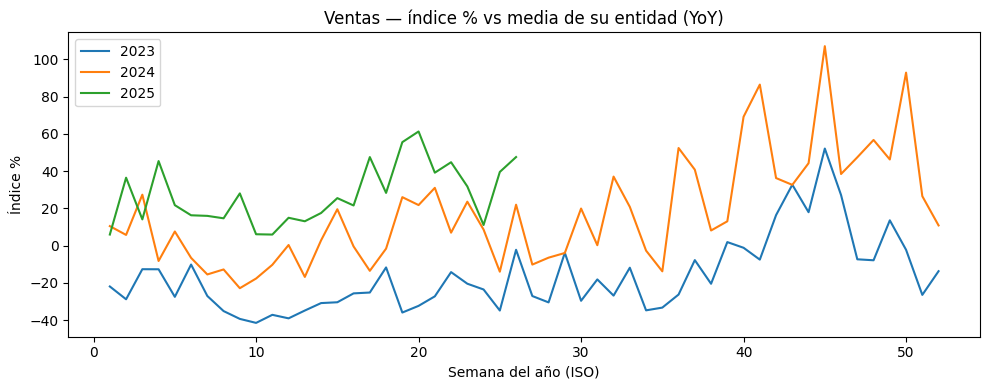

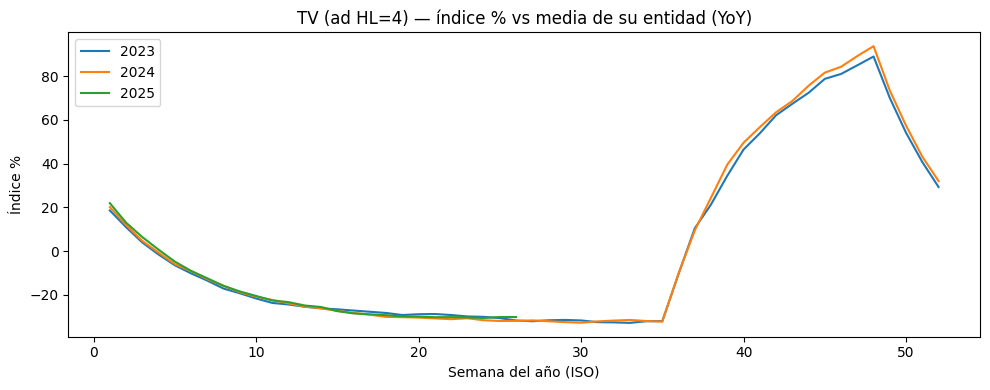

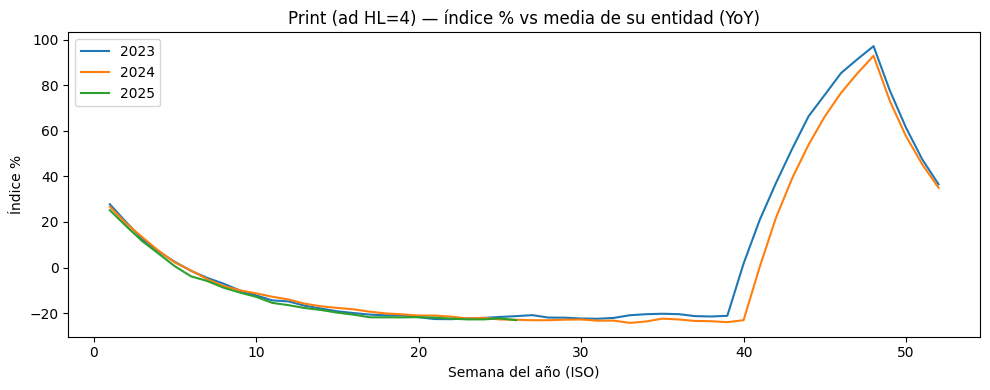

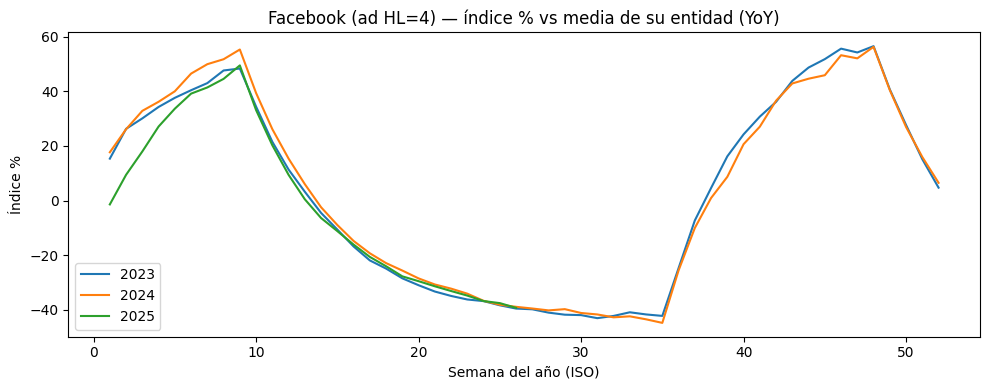

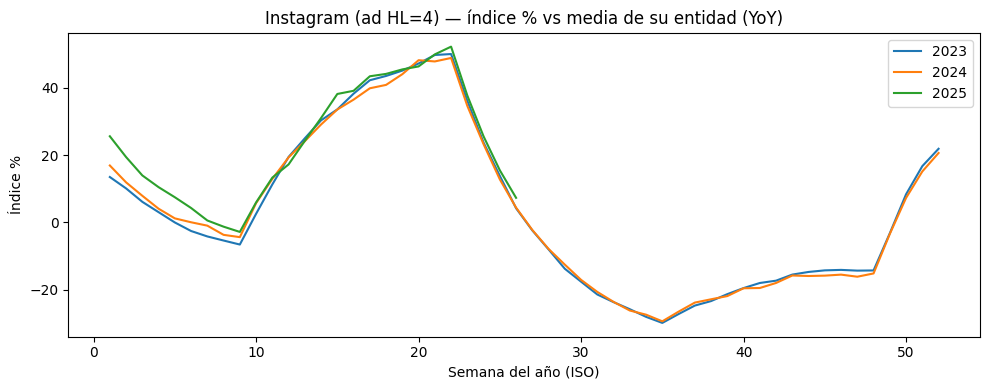

In [11]:


# 0) Requisitos mínimos
req = [
    'Week','Brand','Geo','Sales_Value',
    'TV_Impressions_ad_hl4','Print_Readership_ad_hl4',
    'Facebook_Impressions_ad_hl4','Instagram_Impressions_ad_hl4'
]
missing = [c for c in req if c not in panel.columns]
assert not missing, f"Faltan columnas en panel: {missing}"

if 'entity' not in panel.columns:
    panel['entity'] = panel['Brand'].astype(str) + '_' + panel['Geo'].astype(str)

# 1) Semana y año ISO (solo si faltan)
if 'week_of_year' not in panel.columns or 'iso_year' not in panel.columns:
    iso = panel['Week'].dt.isocalendar()
    panel['iso_year'] = iso.year.astype(int)
    panel['week_of_year'] = iso.week.astype(int)

# 2) Índice % dentro de entidad: ((valor / media_entidad) - 1) * 100
g = panel.groupby(['Brand','Geo'])
if 'Sales_idx%' not in panel.columns:
    panel['Sales_idx%'] = (panel['Sales_Value'] / g['Sales_Value'].transform('mean') - 1) * 100

for base in ['TV_Impressions','Print_Readership','Facebook_Impressions','Instagram_Impressions']:
    col = base + '_ad_hl4'
    idx_col = col + '_idx%'
    if idx_col not in panel.columns:
        panel[idx_col] = (panel[col] / g[col].transform('mean') - 1) * 100

# 3) Años a graficar (toma 3 más recientes)
years = sorted(panel['iso_year'].unique())
years_to_plot = years[-3:] if len(years) >= 3 else years

# 4) Helper: grafica YoY una figura por variable (líneas = años)
def plot_yoy(idx_col, titulo):
    plt.figure(figsize=(10,4))
    for y in years_to_plot:
        s = (panel.loc[panel['iso_year']==y, ['week_of_year', idx_col]]
                    .groupby('week_of_year')[idx_col].mean()
                    .reindex(range(1,54)))
        plt.plot(s.index, s.values, label=str(y))
    plt.title(f"{titulo} — índice % vs media de su entidad (YoY)")
    plt.xlabel("Semana del año (ISO)")
    plt.ylabel("Índice %")
    plt.legend()
    plt.tight_layout()
    plt.show()

# 5) Graficas (5 figuras separadas)
plot_yoy('Sales_idx%', "Ventas")
plot_yoy('TV_Impressions_ad_hl4_idx%', "TV (ad HL=4)")
plot_yoy('Print_Readership_ad_hl4_idx%', "Print (ad HL=4)")
plot_yoy('Facebook_Impressions_ad_hl4_idx%', "Facebook (ad HL=4)")
plot_yoy('Instagram_Impressions_ad_hl4_idx%', "Instagram (ad HL=4)")


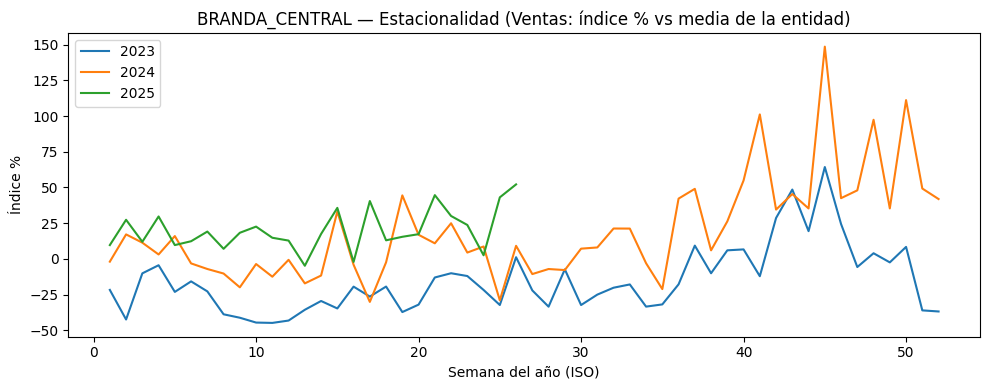

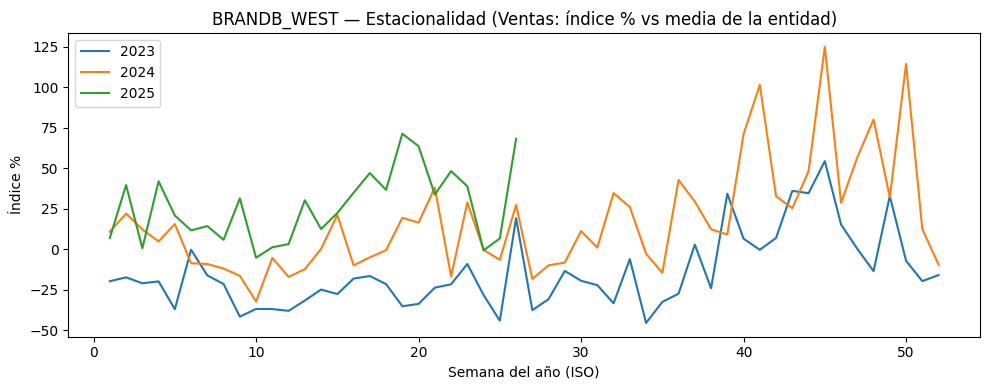

In [12]:
# 0) Guardas minimalistas: solo crean columnas si faltan
if 'entity' not in panel.columns:
    panel['entity'] = panel['Brand'].astype(str) + '_' + panel['Geo'].astype(str)
    
if 'iso_year' not in panel.columns or 'week_of_year' not in panel.columns:
    iso = panel['Week'].dt.isocalendar()
    panel['iso_year'] = iso.year.astype(int)
    panel['week_of_year'] = iso.week.astype(int)
    
if 'sales_idx_pct' not in panel.columns:
    g = panel.groupby(['Brand','Geo'])['Sales_Value']
    panel['sales_idx_pct'] = (panel['Sales_Value'] / g.transform('mean') - 1) * 100

# 1) Años a graficar (3 más recientes)
years = sorted(panel['iso_year'].unique())[-3:]

# 2) Elige entidades (top por ventas) o define manualmente
#ENTITIES_TO_PLOT = (panel.groupby('entity')['Sales_Value'].sum().sort_values(ascending=False).index[:8])

# Ejemplo para elegir manual:
ENTITIES_TO_PLOT = ['BRANDA_CENTRAL','BRANDB_WEST']

# 3) Una figura por entidad; líneas = años
for ent in ENTITIES_TO_PLOT:
    sub = panel[panel['entity'] == ent]
    plt.figure(figsize=(10,4))
    for y in years:
        s = (sub.loc[sub['iso_year']==y, ['week_of_year','sales_idx_pct']].groupby('week_of_year')['sales_idx_pct'].mean().reindex(range(1,54)))
        plt.plot(s.index, s.values, label=str(y))
    plt.title(f'{ent} — Estacionalidad (Ventas: índice % vs media de la entidad)')
    plt.xlabel('Semana del año (ISO)'); plt.ylabel('Índice %'); plt.legend(); plt.tight_layout(); plt.show()


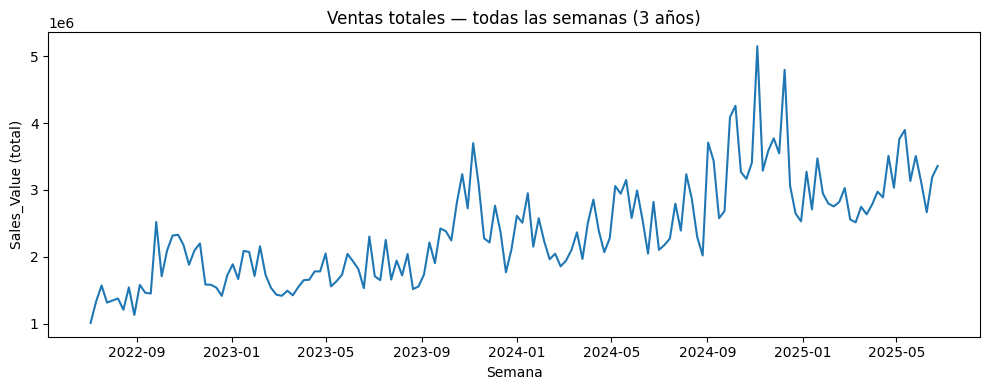

In [13]:


ts = (panel.groupby('Week')['Sales_Value'].sum().sort_index())

plt.figure(figsize=(10,4))
plt.plot(ts.index, ts.values)
plt.title("Ventas totales — todas las semanas (3 años)")
plt.xlabel("Semana")
plt.ylabel("Sales_Value (total)")
plt.tight_layout()
plt.show()


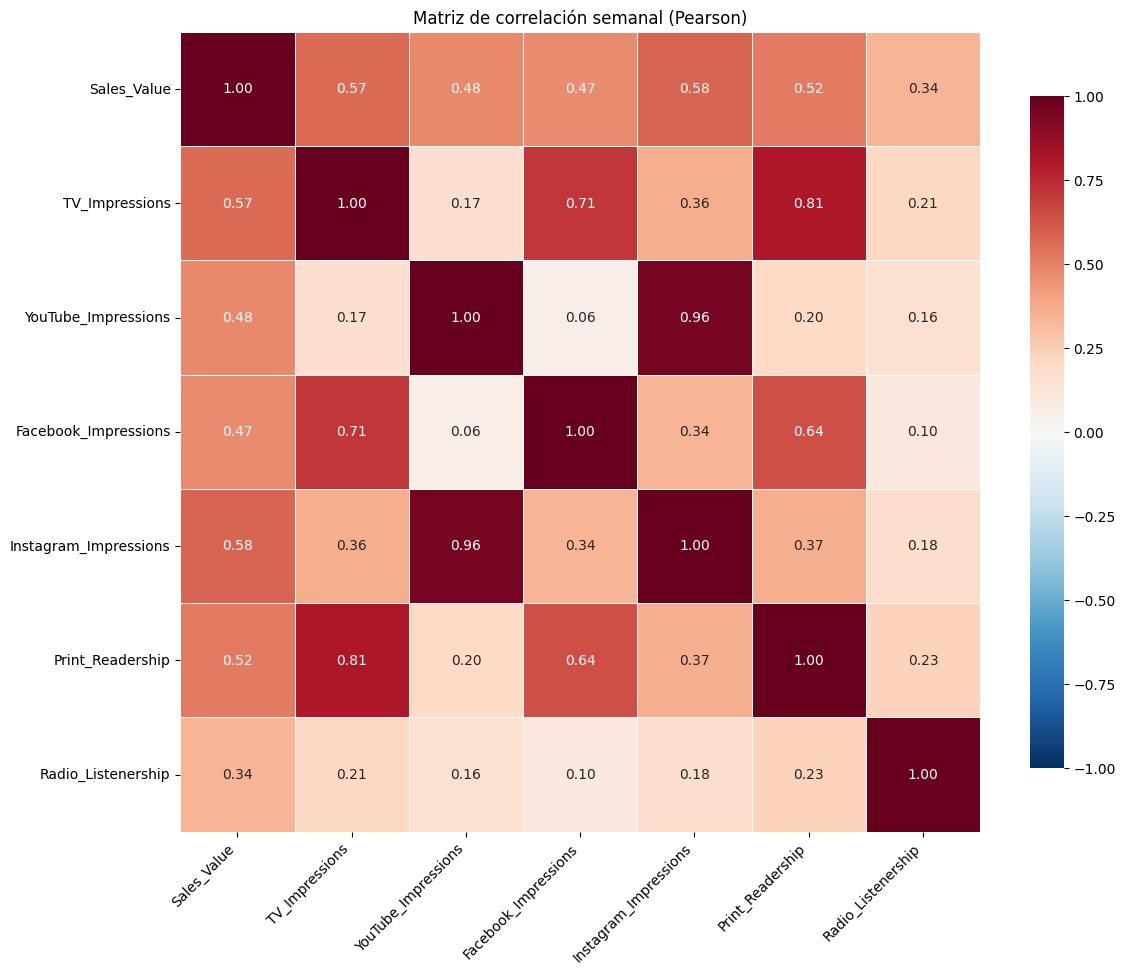

In [14]:
X = panel[['Sales_Value','TV_Impressions', 'YouTube_Impressions','Facebook_Impressions', 'Instagram_Impressions','Print_Readership', 'Radio_Listenership']].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

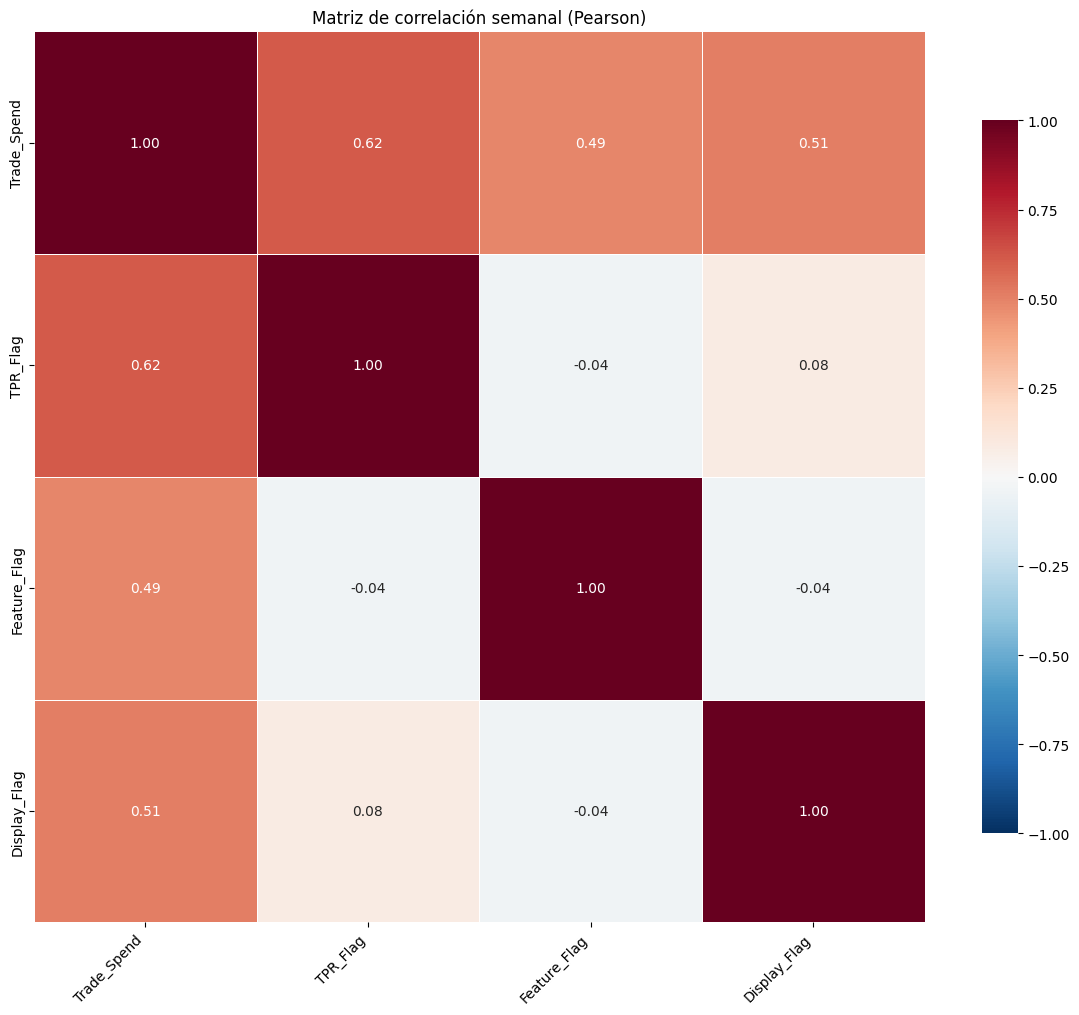

In [15]:
X = panel[['Trade_Spend',"TPR_Flag","Feature_Flag","Display_Flag"]].corr()
#mask = np.triu(np.ones_like(X, dtype=bool))  # oculta triángulo sup.

plt.figure(figsize=(12,10))
sns.heatmap(
    X,
    #mask=mask,                 # oculta triángulo superior
    annot=True, fmt=".2f",     # números dentro de cada celda
    cmap="RdBu_r",             # rojo(+) / azul(-) 
    vmin=-1, vmax=1, center=0, # escala fija -1..1
    linewidths=.5, square=True,
    cbar_kws={"shrink": .8}
)
plt.xticks(rotation=45, ha="right")
plt.title("Matriz de correlación semanal (Pearson)")
plt.tight_layout()
plt.show()

In [ ]:
# Acomodamos por cronologicamente por seman 
panel = panel.sort_values('Week').copy()

# Baseline sólo si falta
if 't' not in panel.columns:
    panel['t'] = (panel['Week'] - panel['Week'].min()).dt.days // 7
    w = 2*np.pi*panel['t']/52.0
    panel['sin52'], panel['cos52'] = np.sin(w), np.cos(w)
    panel['sin26'], panel['cos26'] = np.sin(2*w), np.cos(2*w)

BASELINE = []
for c in ['t','sin52','cos52','sin26','cos26']:
    if c in panel.columns:
        BASELINE.append(c)

print("Variables de baseline disponibles para modelo:", BASELINE)

MEDIA_AD = []
for c in ['TV_Impressions_ad_hl4','Print_Readership_ad_hl4','Facebook_Impressions_ad_hl4','Instagram_Impressions_ad_hl4']:
    if c in panel.columns:
        MEDIA_AD.append(c)
        
print("Medios disponibles para modelo:", MEDIA_AD)

# Saturación (log1p) de medios — si no existe, la creo
SAT_COLS = []
for c in MEDIA_AD:
    sat = c.replace('_ad_hl4','_sat')
    if sat not in panel.columns:
        panel[sat] = np.log1p(panel[c].clip(lower=0))
    SAT_COLS.append(sat)

print("Variables de medios (saturadas) para modelo:", SAT_COLS)

# Controles (usa sólo los que existan)
CAND_CONTROLS = ['Net_Price','Weighted_Distribution','TPR_Flag','Feature_Flag','Display_Flag']


CONTROLS = [c for c in CAND_CONTROLS if c in panel.columns]


# Fórmula OLS con efectos fijos por entidad
features = SAT_COLS + CONTROLS + BASELINE
assert len(features) > 0, "No hay features; revisa columnas disponibles."
formula = 'Sales_Value ~ ' + ' + '.join(features) + ' + C(entity)'

# Ajuste global con errores agrupados por entidad (resumen corto)
y_all, X_all = dmatrices(formula, data=panel, return_type='dataframe')
ols_all = sm.OLS(y_all, X_all).fit(cov_type='cluster', cov_kwds={'groups': panel['entity']})

print("\n=== Coeficientes (medios y controles) — ajuste con todo el periodo ===")
keep = SAT_COLS + CONTROLS
coef_tbl = pd.DataFrame({
    'coef': ols_all.params[keep],
    'std_err': ols_all.bse[keep],
    't': ols_all.tvalues[keep],
    'pval': ols_all.pvalues[keep],
})
print(coef_tbl.round(4))

# Evaluación holdout (últimas 12 semanas)
weeks = np.sort(panel['Week'].unique())
cutoff = weeks[-12] if len(weeks) >= 12 else weeks[int(len(weeks)*0.8)]
train = panel[panel['Week'] < cutoff]
test  = panel[panel['Week'] >= cutoff]

y_tr, X_tr = dmatrices(formula, data=train, return_type='dataframe')
y_te, X_te = dmatrices(formula, data=test,  return_type='dataframe')

ols_tr = sm.OLS(y_tr, X_tr).fit()
yhat = ols_tr.predict(X_te)

R2 = 1 - ((y_te.values.ravel()-yhat)**2).sum() / ((y_te.values.ravel()-y_te.values.ravel().mean())**2).sum()
WAPE = np.abs(y_te.values.ravel()-yhat).sum() / np.abs(y_te.values.ravel()).sum()

print(f"\n=== Holdout (últimas 12 semanas) ===\nR2: {R2:.3f} | WAPE: {WAPE:.3f}")

# Contribución aproximada por canal (en holdout): X*beta sólo para SAT_COLS
beta = ols_tr.params
X_media = X_te[[c for c in X_te.columns if any(k in c for k in SAT_COLS)]]
beta_media = beta[X_media.columns]
contrib_channels = (X_media * beta_media).sum(axis=0).sort_values(ascending=False)
print("\nContribución por canal en holdout (escala del modelo):")
print(contrib_channels.round(2))


Variables de baseline disponibles para modelo: ['t', 'sin52', 'cos52', 'sin26', 'cos26']
Medios disponibles para modelo: ['TV_Impressions_ad_hl4', 'Print_Readership_ad_hl4', 'Facebook_Impressions_ad_hl4', 'Instagram_Impressions_ad_hl4']
Variables de medios (saturadas) para modelo: ['TV_Impressions_sat', 'Print_Readership_sat', 'Facebook_Impressions_sat', 'Instagram_Impressions_sat']

=== Coeficientes (medios y controles) — ajuste con todo el periodo ===
                                  coef     std_err       t    pval
TV_Impressions_sat          -1370.5081  13190.7714 -0.1039  0.9172
Print_Readership_sat        -6343.6115   2472.3055 -2.5659  0.0103
Facebook_Impressions_sat    14372.8631   7984.3334  1.8001  0.0718
Instagram_Impressions_sat   -8710.2630   4742.3416 -1.8367  0.0663
Net_Price                   -3818.3245   1371.9536 -2.7831  0.0054
Weighted_Distribution      111731.7737  29041.7060  3.8473  0.0001
TPR_Flag                    -8888.3547  11572.0474 -0.7681  0.4424
Featur

In [21]:
# === REGRESIÓN MÍNIMA (sin crear columnas nuevas) ===
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices

# 0) Asegures que Week es datetime y que existe 'entity'
panel = panel.copy()
panel['Week'] = pd.to_datetime(panel['Week'])
panel = panel.sort_values('Week')
if 'entity' not in panel.columns:
    raise ValueError("Falta la columna 'entity' que junta Geo|Brand|SKU (o tu definición).")

# 1) Variable objetivo (cambia a 'Sales_Units' si quieres)
Y_VAR = 'Sales_Value'
if Y_VAR not in panel.columns:
    raise ValueError(f"Falta la columna objetivo {Y_VAR} en panel.")

# 2) Columnas de medios (usa sólo las que existan en TU panel)
CAND_MEDIA = [
    'TV_Impressions_ad_hl4',
    'YouTube_Impressions_ad_hl4',
    'Facebook_Impressions_ad_hl4',
    'Instagram_Impressions_ad_hl4',
    'Print_Readership_ad_hl4',
    'Radio_Listenership_ad_hl4'
]
MEDIA = [c for c in CAND_MEDIA if c in panel.columns]

# 3) Controles (usa sólo los que existan)
CAND_CONTROLS = ['Net_Price','Weighted_Distribution','TPR_Flag','Feature_Flag','Display_Flag']
CONTROLS = [c for c in CAND_CONTROLS if c in panel.columns]

# 4) Fórmula OLS con efectos fijos por entidad (sin baseline extra)
features = MEDIA + CONTROLS
if len(features) == 0:
    raise ValueError("No hay columnas de medios ni controles disponibles.")
formula = f'{Y_VAR} ~ ' + ' + '.join(features) + ' + C(entity)'

print("Características usadas en el modelo:")
print("MEDIOS:", MEDIA)
print("CONTROLES:", CONTROLS)
print("Fórmula:", formula)

# 5) Ajuste global con errores agrupados por entidad
y_all, X_all = dmatrices(formula, data=panel, return_type='dataframe')
ols_all = sm.OLS(y_all, X_all).fit(cov_type='cluster', cov_kwds={'groups': panel['entity']})

print("\n=== Coeficientes (medios y controles) — todo el periodo ===")
keep = MEDIA + CONTROLS  # mostramos sólo estos; FE no aportan lectura
coef_tbl = pd.DataFrame({
    'coef': ols_all.params[keep],
    'std_err': ols_all.bse[keep],
    't': ols_all.tvalues[keep],
    'pval': ols_all.pvalues[keep],
})
print(coef_tbl.round(4))

# 6) Holdout (últimas 12 semanas)
weeks = np.sort(panel['Week'].unique())
cutoff = weeks[-12] if len(weeks) >= 12 else weeks[int(len(weeks)*0.8)]
train = panel[panel['Week'] < cutoff]
test  = panel[panel['Week'] >= cutoff]

y_tr, X_tr = dmatrices(formula, data=train, return_type='dataframe')
y_te, X_te = dmatrices(formula, data=test,  return_type='dataframe')

# Alineamos columnas de test a las de train (por si hay entidades no vistas)
X_te = X_te.reindex(columns=X_tr.columns, fill_value=0.0)

ols_tr = sm.OLS(y_tr, X_tr).fit()
yhat = ols_tr.predict(X_te).values.ravel()
ytrue = y_te.values.ravel()

R2 = 1 - ((ytrue - yhat)**2).sum() / ((ytrue - ytrue.mean())**2).sum()
WAPE = np.abs(ytrue - yhat).sum() / np.abs(ytrue).sum()
print(f"\n=== Holdout (últimas 12 semanas) ===\nR2: {R2:.3f} | WAPE: {WAPE:.3f}")


Características usadas en el modelo:
MEDIOS: ['TV_Impressions_ad_hl4', 'YouTube_Impressions_ad_hl4', 'Facebook_Impressions_ad_hl4', 'Instagram_Impressions_ad_hl4', 'Print_Readership_ad_hl4', 'Radio_Listenership_ad_hl4']
CONTROLES: ['Net_Price', 'Weighted_Distribution', 'TPR_Flag', 'Feature_Flag', 'Display_Flag']
Fórmula: Sales_Value ~ TV_Impressions_ad_hl4 + YouTube_Impressions_ad_hl4 + Facebook_Impressions_ad_hl4 + Instagram_Impressions_ad_hl4 + Print_Readership_ad_hl4 + Radio_Listenership_ad_hl4 + Net_Price + Weighted_Distribution + TPR_Flag + Feature_Flag + Display_Flag + C(entity)

=== Coeficientes (medios y controles) — todo el periodo ===
                                     coef     std_err        t    pval
TV_Impressions_ad_hl4              0.0019      0.0002  12.2344  0.0000
YouTube_Impressions_ad_hl4         0.0010      0.0003   2.7601  0.0058
Facebook_Impressions_ad_hl4        0.0008      0.0004   2.0757  0.0379
Instagram_Impressions_ad_hl4      -0.0004      0.0003  -1.2967 

In [17]:

Xvif = panel[[*SAT_COLS]].dropna()
vif = pd.Series([variance_inflation_factor(Xvif.values, i) for i in range(Xvif.shape[1])],
                index=SAT_COLS)
print(vif.sort_values(ascending=False))


Print_Readership_sat         4186.722098
TV_Impressions_sat           3285.606538
Facebook_Impressions_sat     2831.314387
Instagram_Impressions_sat    1251.030956
dtype: float64
